Overview of Project-Part 1

This is an overview of the steps you will need to complete for part one of the project. There are more detailed instructions for each section following the overview.

1) Create a GitHub Account

2) Set up a GitHub repository that will house your first portfolio project.

3) Add Markdown cells with your name and section headers to the notebook.

4) Use Pandas to read the sales prediction data set into Google Colab and preview the data.

5) Add the Google Colab Notebook to your GitHub repository.

6) Submit the link to your GitHub repo!

# Project 1 - Part 1-4

## Loading Data

In [1]:
import pandas as pd

In [2]:
Sales_Predictions_File = 'sales_predictions.csv'

In [3]:
SPF = pd.read_csv(Sales_Predictions_File)
SPF.info(Sales_Predictions_File)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            8523 non-null   object 
 1   Item_Weight                7060 non-null   float64
 2   Item_Fat_Content           8523 non-null   object 
 3   Item_Visibility            8523 non-null   float64
 4   Item_Type                  8523 non-null   object 
 5   Item_MRP                   8523 non-null   float64
 6   Outlet_Identifier          8523 non-null   object 
 7   Outlet_Establishment_Year  8523 non-null   int64  
 8   Outlet_Size                6113 non-null   object 
 9   Outlet_Location_Type       8523 non-null   object 
 10  Outlet_Type                8523 non-null   object 
 11  Item_Outlet_Sales          8523 non-null   float64
dtypes: float64(4), int64(1), object(7)
memory usage: 799.2+ KB


In [4]:
SPF.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


## Data Cleaning

In [5]:
# 1) How many rows and columns?
SPF.shape

(8523, 12)

In [6]:
# 2) What are the datatypes of each variable?
SPF.dtypes


Item_Identifier               object
Item_Weight                  float64
Item_Fat_Content              object
Item_Visibility              float64
Item_Type                     object
Item_MRP                     float64
Outlet_Identifier             object
Outlet_Establishment_Year      int64
Outlet_Size                   object
Outlet_Location_Type          object
Outlet_Type                   object
Item_Outlet_Sales            float64
dtype: object

In [7]:
# 3) Are there duplicates? If so, drop any duplicates.
SPF.duplicated().sum()

#Sum = 0 means no duplicates

0

In [8]:
# 4) Identify missing values.
SPF.isna().sum()

Item_Identifier                 0
Item_Weight                  1463
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  2410
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
dtype: int64

In [9]:
SPF.nunique()

Item_Identifier              1559
Item_Weight                   415
Item_Fat_Content                5
Item_Visibility              7880
Item_Type                      16
Item_MRP                     5938
Outlet_Identifier              10
Outlet_Establishment_Year       9
Outlet_Size                     3
Outlet_Location_Type            3
Outlet_Type                     4
Item_Outlet_Sales            3493
dtype: int64

In [10]:
# 5) Decide on how to address the missing values and do it! (This requires your judgement, so explain your choice).
SPF.drop(columns='Item_Weight', inplace=True)
# Item Weight does not seem relevant to the topic, as item weight is hardly a factor in product sales.
SPF['Outlet_Size'].fillna('Missing', inplace=True)
# Outlet Size could become a relevant datatype with more information. Outlet size could be approximated when more patterns or data is discerned.


In [11]:
# 6) Confirm that there are no missing values after addressing them.
SPF.isna().sum()

Item_Identifier              0
Item_Fat_Content             0
Item_Visibility              0
Item_Type                    0
Item_MRP                     0
Outlet_Identifier            0
Outlet_Establishment_Year    0
Outlet_Size                  0
Outlet_Location_Type         0
Outlet_Type                  0
Item_Outlet_Sales            0
dtype: int64

In [12]:
# 7) Find and fix any inconsistent categories of data (example: fix cat, Cat, and cats so that they are consistent). 
SPF.value_counts()

Item_Identifier  Item_Fat_Content  Item_Visibility  Item_Type              Item_MRP  Outlet_Identifier  Outlet_Establishment_Year  Outlet_Size  Outlet_Location_Type  Outlet_Type        Item_Outlet_Sales
DRA12            LF                0.000000         Soft Drinks            141.9154  OUT035             2004                       Small        Tier 2                Supermarket Type1  992.7078             1
FDV28            Regular           0.000000         Frozen Foods           35.1558   OUT017             2007                       Missing      Tier 2                Supermarket Type1  339.5580             1
FDV32            Low Fat           0.089210         Fruits and Vegetables  64.2510   OUT017             2007                       Missing      Tier 2                Supermarket Type1  1328.2710            1
                                   0.089070         Fruits and Vegetables  62.7510   OUT018             2009                       Medium       Tier 3                Superma

In [13]:
SPF['Item_Fat_Content'].value_counts()

Low Fat    5089
Regular    2889
LF          316
reg         117
low fat     112
Name: Item_Fat_Content, dtype: int64

In [14]:
SPF['Item_Fat_Content'] = SPF['Item_Fat_Content'].replace('LF', 'Low Fat')
SPF['Item_Fat_Content'] = SPF['Item_Fat_Content'].replace('reg', 'Regular')
SPF['Item_Fat_Content'] = SPF['Item_Fat_Content'].replace('low fat', 'Low Fat')
SPF['Item_Fat_Content'].value_counts()

Low Fat    5517
Regular    3006
Name: Item_Fat_Content, dtype: int64

In [15]:
SPF['Item_Type'].value_counts()

Fruits and Vegetables    1232
Snack Foods              1200
Household                 910
Frozen Foods              856
Dairy                     682
Canned                    649
Baking Goods              648
Health and Hygiene        520
Soft Drinks               445
Meat                      425
Breads                    251
Hard Drinks               214
Others                    169
Starchy Foods             148
Breakfast                 110
Seafood                    64
Name: Item_Type, dtype: int64

In [16]:
SPF['Outlet_Type'].value_counts()

Supermarket Type1    5577
Grocery Store        1083
Supermarket Type3     935
Supermarket Type2     928
Name: Outlet_Type, dtype: int64

In [17]:
SPF

,Item_Identifier,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,Missing,Tier 3,Grocery Store,732.3800
4,NCD19,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052
...,...,...,...,...,...,...,...,...,...,...,...
8518,FDF22,Low Fat,0.056783,Snack Foods,214.5218,OUT013,1987,High,Tier 3,Supermarket Type1,2778.3834
8519,FDS36,Regular,0.046982,Baking Goods,108.1570,OUT045,2002,Missing,Tier 2,Supermarket Type1,549.2850
8520,NCJ29,Low Fat,0.035186,Health and Hygiene,85.1224,OUT035,2004,Small,Tier 2,Supermarket Type1,1193.1136
8521,FDN46,Regular,0.145221,Snack Foods,103.1332,OUT018,2009,Medium,Tier 3,Supermarket Type2,1845.5976


In [18]:
# 8) For any numerical columns, obtain the summary statistics of each (min, max, mean).
SPF.describe().round(2) 

,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales
count,8523.00,8523.00,8523.00,8523.00
mean,0.07,140.99,1997.83,2181.29
std,0.05,62.28,8.37,1706.50
min,0.00,31.29,1985.00,33.29
25%,0.03,93.83,1987.00,834.25
50%,0.05,143.01,1999.00,1794.33
75%,0.09,185.64,2004.00,3101.30
max,0.33,266.89,2009.00,13086.96


## Exploratory Visuals

In [19]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns

([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15],
 [Text(0, 0, 'Dairy'),
  Text(1, 0, 'Soft Drinks'),
  Text(2, 0, 'Meat'),
  Text(3, 0, 'Fruits and Vegetables'),
  Text(4, 0, 'Household'),
  Text(5, 0, 'Baking Goods'),
  Text(6, 0, 'Snack Foods'),
  Text(7, 0, 'Frozen Foods'),
  Text(8, 0, 'Breakfast'),
  Text(9, 0, 'Health and Hygiene'),
  Text(10, 0, 'Hard Drinks'),
  Text(11, 0, 'Canned'),
  Text(12, 0, 'Breads'),
  Text(13, 0, 'Starchy Foods'),
  Text(14, 0, 'Others'),
  Text(15, 0, 'Seafood')])

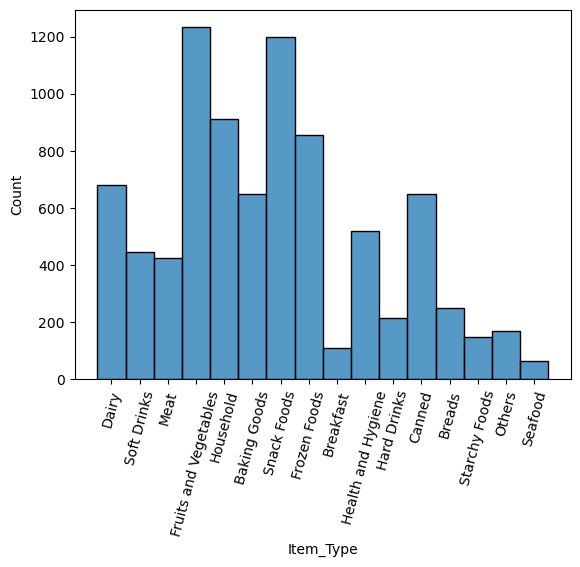

In [20]:
fig = plt.figure()
fig.set_facecolor("w")
sns.histplot(data=SPF, x='Item_Type')
plt.xticks(rotation = 75)

According to the data, Fruits and Vegetables or Snack Foods make up the majority of item types. 

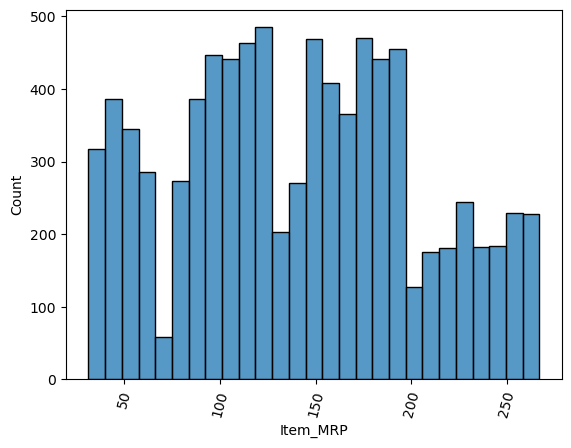

In [21]:
sns.histplot(data=SPF, x='Item_MRP');
plt.xticks(rotation = 75);


According to the data, most of the items sell between 80 and 200 MRP.

<Axes: >

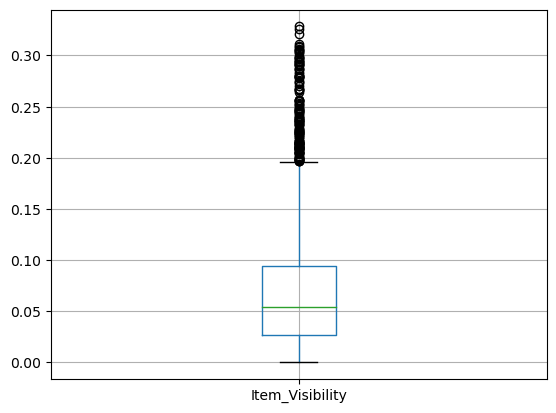

In [22]:
SPF.boxplot('Item_Visibility')

Median Visibility is .05 but there are a lot of outliers. 

<Axes: >

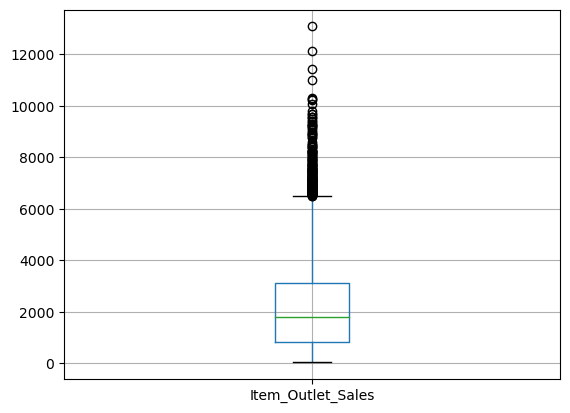

In [23]:
SPF.boxplot('Item_Outlet_Sales')

Similar to Visibility, there are a lot of outliers in the outlet sales statistic. 

<Axes: >

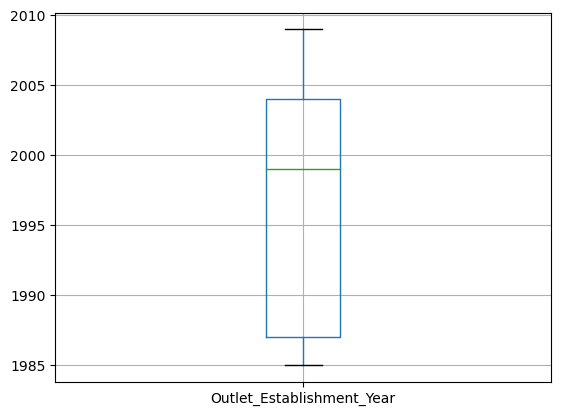

In [24]:
SPF.boxplot('Outlet_Establishment_Year')

Median establishment year is 1999.

In [25]:
corr = SPF.corr()
corr

C:\Users\tulan\AppData\Local\Temp\ipykernel_2500\2494948615.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr = SPF.corr()


,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales
Item_Visibility,1.000000,-0.001315,-0.074834,-0.128625
Item_MRP,-0.001315,1.000000,0.005020,0.567574
Outlet_Establishment_Year,-0.074834,0.005020,1.000000,-0.049135
Item_Outlet_Sales,-0.128625,0.567574,-0.049135,1.000000


(array([0.5, 1.5, 2.5, 3.5]),
 [Text(0.5, 0, 'Item_Visibility'),
  Text(1.5, 0, 'Item_MRP'),
  Text(2.5, 0, 'Outlet_Establishment_Year'),
  Text(3.5, 0, 'Item_Outlet_Sales')])

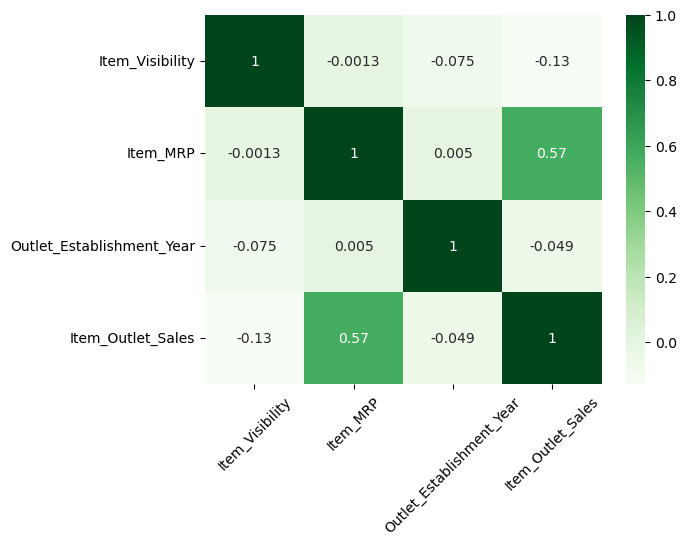

In [26]:
import seaborn as sns

sns.heatmap(corr, cmap = 'Greens', annot = True)
plt.xticks(rotation = 45)

There seems to be a correlation between MRP and Outlet sales. 

## Explanatory Visuals

Let's take a closer look at the relationship between MRP and sales:

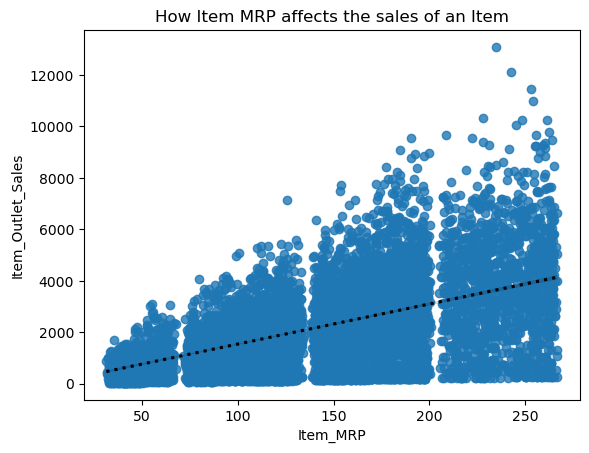

In [27]:
fig = plt.figure()
fig.set_facecolor("w")
ax = sns.regplot(data=SPF, x='Item_MRP', y='Item_Outlet_Sales', line_kws = {'color':'black', 'ls': ':'})
ax.set_title('How Item MRP affects the sales of an Item');


The data marks an interesting trend, as MRP (Maximum retail price) increases, sales increases as well. Though there are many items and instances of data, this shows that, in general, the overall price of the item does not negatively affect the sale of the item. 

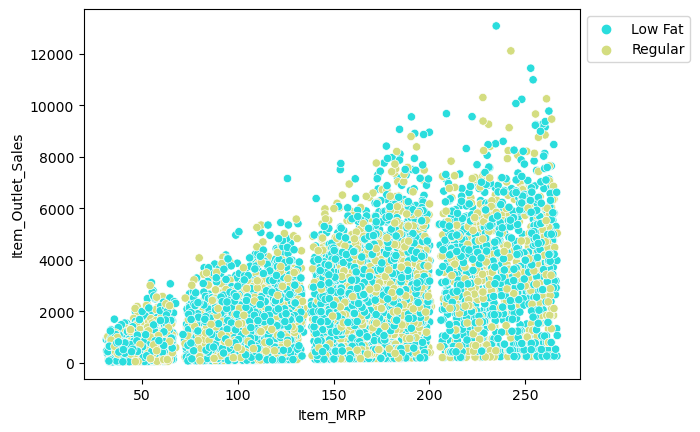

In [28]:
ax = sns.scatterplot(data=SPF, x='Item_MRP', y='Item_Outlet_Sales', hue = 'Item_Fat_Content', palette = 'rainbow')
ax.legend(bbox_to_anchor=[1,1]);

It would seem that other factors, such as fat content, do not affect the overall trend that the previous graph indicated. 

Now let's look at Item Sales by type:

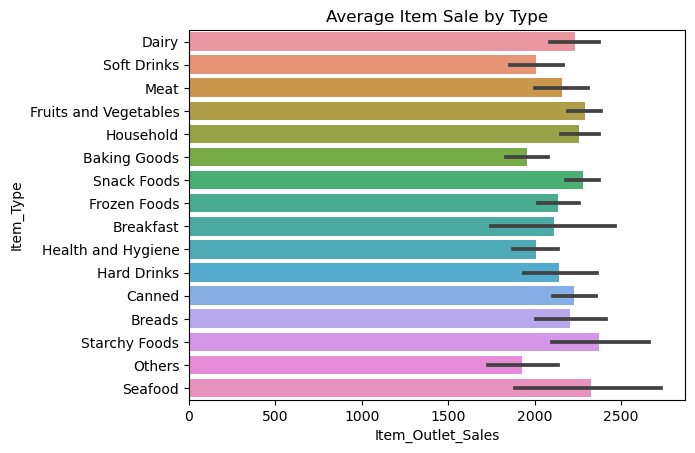

In [29]:
sns.barplot(data=SPF, x = 'Item_Outlet_Sales', y = 'Item_Type').set(title='Average Item Sale by Type');

plt.xticks(rotation = 0);


As we can see, Seafood and Starcy Foods have the highest Average Item Sales, this can be valuable in seeing which items are most sought after by consumers when going to the super market. 

# Project 1 - Part 5

## Loading data 

In [30]:
SPF_ml = pd.read_csv(Sales_Predictions_File, index_col=False)
SPF_ml.info(Sales_Predictions_File)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            8523 non-null   object 
 1   Item_Weight                7060 non-null   float64
 2   Item_Fat_Content           8523 non-null   object 
 3   Item_Visibility            8523 non-null   float64
 4   Item_Type                  8523 non-null   object 
 5   Item_MRP                   8523 non-null   float64
 6   Outlet_Identifier          8523 non-null   object 
 7   Outlet_Establishment_Year  8523 non-null   int64  
 8   Outlet_Size                6113 non-null   object 
 9   Outlet_Location_Type       8523 non-null   object 
 10  Outlet_Type                8523 non-null   object 
 11  Item_Outlet_Sales          8523 non-null   float64
dtypes: float64(4), int64(1), object(7)
memory usage: 799.2+ KB


In [31]:
SPF_ml

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.300,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.920,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.500,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.200,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.930,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052
...,...,...,...,...,...,...,...,...,...,...,...,...
8518,FDF22,6.865,Low Fat,0.056783,Snack Foods,214.5218,OUT013,1987,High,Tier 3,Supermarket Type1,2778.3834
8519,FDS36,8.380,Regular,0.046982,Baking Goods,108.1570,OUT045,2002,NaN,Tier 2,Supermarket Type1,549.2850
8520,NCJ29,10.600,Low Fat,0.035186,Health and Hygiene,85.1224,OUT035,2004,Small,Tier 2,Supermarket Type1,1193.1136
8521,FDN46,7.210,Regular,0.145221,Snack Foods,103.1332,OUT018,2009,Medium,Tier 3,Supermarket Type2,1845.5976


In [32]:
SPF_ml.isna().sum()

Item_Identifier                 0
Item_Weight                  1463
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  2410
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
dtype: int64

In [33]:
SPF_ml.drop_duplicates(inplace=True)

We will deal with missing values with the imputer. 

In [34]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.compose import make_column_selector, make_column_transformer
from sklearn.preprocessing import StandardScaler, MinMaxScaler, OneHotEncoder, \
OrdinalEncoder
from sklearn.pipeline import make_pipeline
from sklearn.impute import SimpleImputer
from sklearn import set_config
set_config(display='diagram')

## Identify the features (X) and target (y): Assign the "Item_Outlet_Sales" column as your target and the rest of the relevant variables as your features matrix.

In [35]:
X = SPF_ml.drop(columns = 'Item_Outlet_Sales')
y = SPF_ml['Item_Outlet_Sales']

## Perform a train test split 

In [36]:
X_train, X_test, y_train, y_test = train_test_split(X,y,random_state=42)

## Create a preprocessing object to prepare the dataset for Machine Learning

In [37]:
# Scalers, Encoders and Imputers
scaler1 = StandardScaler()
ohe = OneHotEncoder(sparse=False, handle_unknown='ignore')

mean_imputer = SimpleImputer(strategy='mean')
missing_imputer = SimpleImputer(strategy='constant', fill_value='missing')

In [38]:
# Column selectors
cat_selector = make_column_selector(dtype_include='object')
num_selector = make_column_selector(dtype_include='number')

In [39]:
cat_selector(X_train)

['Item_Identifier',
 'Item_Fat_Content',
 'Item_Type',
 'Outlet_Identifier',
 'Outlet_Size',
 'Outlet_Location_Type',
 'Outlet_Type']

In [40]:
num_selector(X_train)


['Item_Weight', 'Item_Visibility', 'Item_MRP', 'Outlet_Establishment_Year']

In [41]:
#Ordinal Encoder
Size_Labels = ['Small','Medium','High']
ordered_labels = [Size_Labels]
ordinal = OrdinalEncoder(categories = ordered_labels, handle_unknown='use_encoded_value', unknown_value=-1)

In [42]:
# Setup the pipelines for the numeric and categorical data

num_pipeline = make_pipeline(mean_imputer, scaler1)
ord_pipeline = make_pipeline(missing_imputer, ordinal)
nom_pipeline = make_pipeline(missing_imputer, ohe)

Create Tuples to Pair Pipelines with Columns

In [43]:
# Create column lists for objects and a number selector
ordinal_cols = ['Outlet_Size']
nominal_cols = ['Item_Identifier',
 'Item_Fat_Content',
 'Item_Type',
 'Outlet_Identifier',
 'Outlet_Location_Type',
 'Outlet_Type']

num_selector = make_column_selector(dtype_include='number')

# Setup the tuples to pair the processors with the make column selectors

numeric_tuple = (num_pipeline, num_selector)
ordinal_tuple = (ord_pipeline, ordinal_cols)
nominal_tuple = (nom_pipeline, nominal_cols)

In [44]:
# Instantiate the make column transformer

preprocessor = make_column_transformer(ordinal_tuple, 
                                          numeric_tuple, 
                                          nominal_tuple, 
                                          remainder='drop')

## Make sure your imputation of missing values occurs after the train test split using SimpleImputer. 

In [45]:
preprocessor.fit(X_train)

D:\Anaconda\envs\dojo-env\lib\site-packages\sklearn\preprocessing\_encoders.py:828: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


ColumnTransformer(transformers=[('pipeline-1',
                                 Pipeline(steps=[('simpleimputer',
                                                  SimpleImputer(fill_value='missing',
                                                                strategy='constant')),
                                                 ('ordinalencoder',
                                                  OrdinalEncoder(categories=[['Small',
                                                                              'Medium',
                                                                              'High']],
                                                                 handle_unknown='use_encoded_value',
                                                                 unknown_value=-1))]),
                                 ['Outlet_Size']),
                                ('pipeline-2',
                                 Pipeline(steps=[('simpleimputer',
                                                  SimpleImputer()),
                                                 ('sta...
                                 <sklearn.compose._column_transformer.make_column_selector object at 0x000001F0BD6DD970>),
                                ('pipeline-3',
                                 Pipeline(steps=[('simpleimputer',
                                                  SimpleImputer(fill_value='missing',
                                                                strategy='constant')),
                                                 ('onehotencoder',
                                                  OneHotEncoder(handle_unknown='ignore',
                                                                sparse=False))]),
                                 ['Item_Identifier', 'Item_Fat_Content',
                                  'Item_Type', 'Outlet_Identifier',
                                  'Outlet_Location_Type', 'Outlet_Type'])])

In [46]:
X_train_processed = preprocessor.transform(X_train)
X_test_processed = preprocessor.transform(X_test)

X_train_processed

array([[ 1.        ,  0.81724868, -0.71277507, ...,  0.        ,
         1.        ,  0.        ],
       [ 1.        ,  0.5563395 , -1.29105225, ...,  0.        ,
         1.        ,  0.        ],
       [ 1.        , -0.13151196,  1.81331864, ...,  1.        ,
         0.        ,  0.        ],
       ...,
       [-1.        ,  1.11373638, -0.92052713, ...,  1.        ,
         0.        ,  0.        ],
       [-1.        ,  1.76600931, -0.2277552 , ...,  1.        ,
         0.        ,  0.        ],
       [ 0.        ,  0.81724868, -0.95867683, ...,  1.        ,
         0.        ,  0.        ]])

In [47]:
print(np.isnan(X_train_processed).sum().sum(), 'missing values in training data')
print(np.isnan(X_test_processed).sum().sum(), 'missing values in testing data')
print('\n')
print('All data in X_train_processed are', X_train_processed.dtype)
print('All data in X_test_processed are', X_test_processed.dtype)
print('\n')
print('shape of data in Train is', X_train_processed.shape)
print('shape of data in Test is', X_test_processed.shape)
print('\n')

0 missing values in training data
0 missing values in testing data


All data in X_train_processed are float64
All data in X_test_processed are float64


shape of data in Train is (6392, 1593)
shape of data in Test is (2131, 1593)




# Project 1 - Part 6

In [48]:
## Additional imports
from sklearn.linear_model import LinearRegression
from sklearn.pipeline import make_pipeline
from sklearn.metrics import r2_score, mean_squared_error

## Build a linear regression model.

In [49]:
## Make and fit a linear regression model
lin_reg = LinearRegression()
lin_reg_pipe = make_pipeline(preprocessor, lin_reg)

lin_reg_pipe.fit(X_train, y_train)

D:\Anaconda\envs\dojo-env\lib\site-packages\sklearn\preprocessing\_encoders.py:828: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


Pipeline(steps=[('columntransformer',
                 ColumnTransformer(transformers=[('pipeline-1',
                                                  Pipeline(steps=[('simpleimputer',
                                                                   SimpleImputer(fill_value='missing',
                                                                                 strategy='constant')),
                                                                  ('ordinalencoder',
                                                                   OrdinalEncoder(categories=[['Small',
                                                                                               'Medium',
                                                                                               'High']],
                                                                                  handle_unknown='use_encoded_value',
                                                                                  unknown_value=-1))]),
                                                  ['Outlet_Size']),
                                                 ('pipeline-2',
                                                  Pipeline(steps=[('...
                                                  <sklearn.compose._column_transformer.make_column_selector object at 0x000001F0BD6DD970>),
                                                 ('pipeline-3',
                                                  Pipeline(steps=[('simpleimputer',
                                                                   SimpleImputer(fill_value='missing',
                                                                                 strategy='constant')),
                                                                  ('onehotencoder',
                                                                   OneHotEncoder(handle_unknown='ignore',
                                                                                 sparse=False))]),
                                                  ['Item_Identifier',
                                                   'Item_Fat_Content',
                                                   'Item_Type',
                                                   'Outlet_Identifier',
                                                   'Outlet_Location_Type',
                                                   'Outlet_Type'])])),
                ('linearregression', LinearRegression())])

### Evaluate the performance of your model based on r^2.

In [50]:
# get predictions for train and test data
lin_training_predictions = lin_reg_pipe.predict(X_train)
lin_test_predictions = lin_reg_pipe.predict(X_test)

In [51]:
#Calculating R2
train_r2 = r2_score(y_train, lin_training_predictions)
test_r2 = r2_score(y_test, lin_test_predictions)

In [52]:
train_r2

0.6718020316593908

In [53]:
test_r2

-2.6842231315316127e+18

According to these metrics, the test did not perform very well.

### Evaluate the performance of your model based on rmse.

In [54]:
#Calculate MSE

train_MSE = mean_squared_error(y_train, lin_training_predictions)
test_MSE = mean_squared_error(y_test, lin_test_predictions )

In [55]:
# Calculating RMSE

train_RSME = np.sqrt(train_MSE)
test_RSME = np.sqrt(test_MSE)

In [56]:
train_RSME

985.5391162301185

In [57]:
test_RSME


2721343538640.6055

According to these metrics, the test did not perform very well with either form of measurement.

## Build a simple regression tree model.

In [58]:
from sklearn.tree import DecisionTreeRegressor



In [59]:
# By leaving the parenthesis empty, we are choosing to use all of the default parameters
# So you get the same results, let's set our random_state to the same number
dec_tree = DecisionTreeRegressor(random_state = 42)

In [60]:
dec_tree.fit(X_train_processed, y_train)


DecisionTreeRegressor(random_state=42)

In [61]:
dec_train_preds = dec_tree.predict(X_train_processed)
dec_test_preds = dec_tree.predict(X_test_processed)


### Compare the performance of your model based on r^2.

In [62]:
# evaluate the model
train_score = dec_tree.score(X_train_processed, y_train)
test_score = dec_tree.score(X_test_processed, y_test)
print(train_score)
print(test_score)


1.0
0.22896059898717602


### Compare the performance of your model based on rmse. 

In [63]:
#Calculate MSE

reg_train_MSE = mean_squared_error(y_train, dec_train_preds)
reg_test_MSE = mean_squared_error(y_test, dec_test_preds)

In [64]:
# Calculating RMSE

reg_train_RSME = np.sqrt(reg_train_MSE)
reg_test_RSME = np.sqrt(reg_test_MSE)

In [65]:
reg_train_RSME

6.157330131115108e-16

In [66]:
reg_test_RSME

1458.5198645882163

While still not a super accurate model, this model is far more viable than the linear regression model.

## You now have tried 2 different models on your data set. You need to determine which model to implement.

I recommend the regression tree model as it has the potential to become a fairly accurate model. Further testing and tuning would be needed but it shows promise. 

# Project 1 Revisited - Part 1: Remaking, Saving, and Explaining Your Models

## Remake your X_train and X_test as DataFrames with the feature names extracted from the column transformer instead of combining your preprocessor and model into 1 pipeline.

In [72]:
pd.set_option('display.max_columns',None)

In [74]:


## Our standard import
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## Preprocessing tools
from sklearn.model_selection import train_test_split
from sklearn.compose import make_column_transformer, make_column_selector
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.impute import SimpleImputer


## Models & evaluation metrics
from sklearn import metrics
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
import joblib

# ## setting random state for reproducibility
SEED = 321
np.random.seed(SEED)
plt.style.use(('ggplot','tableau-colorblind10'))



In [78]:
df = pd.read_csv(Sales_Predictions_File)
df.info(Sales_Predictions_File)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            8523 non-null   object 
 1   Item_Weight                7060 non-null   float64
 2   Item_Fat_Content           8523 non-null   object 
 3   Item_Visibility            8523 non-null   float64
 4   Item_Type                  8523 non-null   object 
 5   Item_MRP                   8523 non-null   float64
 6   Outlet_Identifier          8523 non-null   object 
 7   Outlet_Establishment_Year  8523 non-null   int64  
 8   Outlet_Size                6113 non-null   object 
 9   Outlet_Location_Type       8523 non-null   object 
 10  Outlet_Type                8523 non-null   object 
 11  Item_Outlet_Sales          8523 non-null   float64
dtypes: float64(4), int64(1), object(7)
memory usage: 799.2+ KB


In [79]:
X = df.drop(columns = 'Item_Outlet_Sales')
y = df['Item_Outlet_Sales']

X_train, X_test, y_train, y_test = train_test_split(X,y,random_state=SEED)

In [80]:
## make pipelines for categorical vs numeric data
cat_sel = make_column_selector(dtype_include='object')
cat_pipe = make_pipeline(SimpleImputer(strategy='constant',
                                       fill_value='MISSING'),
                         OneHotEncoder(drop='if_binary', sparse_output=False)
                        )

num_sel = make_column_selector(dtype_include='number')
num_pipe = make_pipeline(SimpleImputer(strategy='mean'))


## make the preprocessing column transformer with verbose_feature_names_out=False
preprocessor = make_column_transformer((num_pipe, num_sel),
                                       (cat_pipe,cat_sel),
                                      verbose_feature_names_out=False)
preprocessor



ColumnTransformer(transformers=[('pipeline-1',
                                 Pipeline(steps=[('simpleimputer',
                                                  SimpleImputer())]),
                                 <sklearn.compose._column_transformer.make_column_selector object at 0x000001F0D44F2E20>),
                                ('pipeline-2',
                                 Pipeline(steps=[('simpleimputer',
                                                  SimpleImputer(fill_value='MISSING',
                                                                strategy='constant')),
                                                 ('onehotencoder',
                                                  OneHotEncoder(drop='if_binary',
                                                                sparse_output=False))]),
                                 <sklearn.compose._column_transformer.make_column_selector object at 0x000001F0D44F2FA0>)],
                  verbose_feature_names_out=False)

In [81]:
## fit column transformer and run get_feature_names_out
preprocessor.fit(X_train)
feature_names = preprocessor.get_feature_names_out()


X_train_df = pd.DataFrame(preprocessor.transform(X_train), 
                          columns = feature_names, index = X_train.index)

X_test_df = pd.DataFrame(preprocessor.transform(X_test), 
                          columns = feature_names, index = X_test.index)
X_test_df.head(3)



ValueError: Found unknown categories ['NCR42', 'DRO35', 'NCW05', 'FDW14', 'DRF48'] in column 0 during transform